In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/water_fraction/merged_water_fraction.csv'
data = pd.read_csv(file_path)

# Drop the specified columns
columns_to_ignore = [
    "top_left_lat", "top_left_lon", "top_right_lat", "top_right_lon",
    "bottom_left_lat", "bottom_left_lon", "bottom_right_lat", "bottom_right_lon",
    "satellite","date","sample","ddm","sp_lon","sp_lat"]
data = data.drop(columns=columns_to_ignore)

# Separate features (X) and target variable (Y)
X = data.drop(columns=["water_fraction"])
y = data["water_fraction"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# Train the Random Forest model
rf_model_with_location = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=8)
rf_model_with_location.fit(X_train, y_train)

RandomForestRegressor(n_jobs=8, random_state=42)

Mean Squared Error: 0.014578172739199828
Feature Importances:
             Feature  Importance
2     tx_to_sp_range    0.239612
3     rx_to_sp_range    0.221334
5  gps_ant_gain_db_i    0.192102
4       sp_inc_angle    0.155897
0            ddm_snr    0.119684
1  gps_tx_power_db_w    0.071372


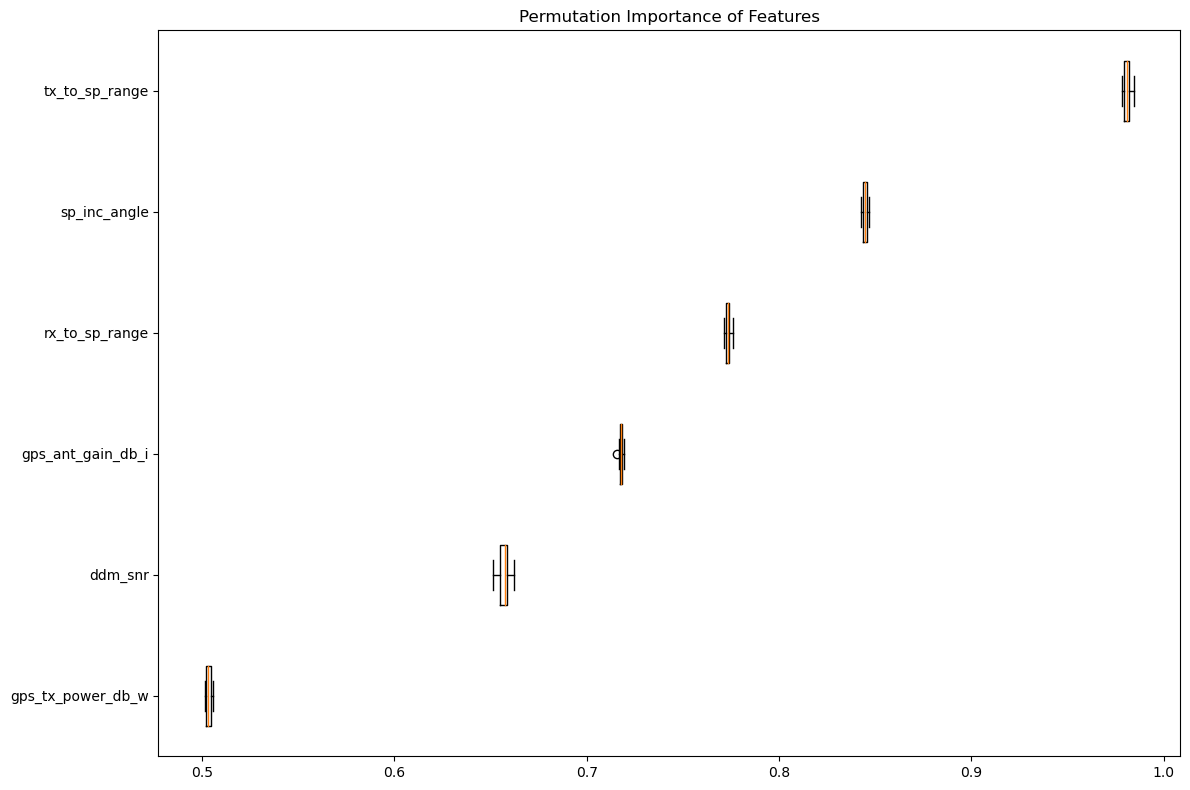

In [4]:
# Make predictions on the test set
y_pred = rf_model_with_location.predict(X_test)

# Evaluate the model
mse_with_location = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_with_location}")

# Feature importance
feature_importances_with_location = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model_with_location.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(feature_importances_with_location)



result = permutation_importance(rf_model_with_location, X_test, y_test, n_repeats=20, random_state=42, n_jobs=1)

# Organizing the results
perm_sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_test.columns[perm_sorted_idx])
plt.title("Permutation Importance of Features")
plt.tight_layout()
plt.show()

Mean Squared Error (MSE): 0.014578172739199828
Root Mean Squared Error (RMSE): 0.12074010410464217
Mean Absolute Error (MAE): 0.06721979300623156
R-squared: 0.885490334941842
Cross-Validated MSE: 0.1360826381228848
Cross-Validated RMSE: 0.36889380331320937
Feature Importances:
             Feature  Importance
2     tx_to_sp_range    0.239612
3     rx_to_sp_range    0.221334
5  gps_ant_gain_db_i    0.192102
4       sp_inc_angle    0.155897
0            ddm_snr    0.119684
1  gps_tx_power_db_w    0.071372


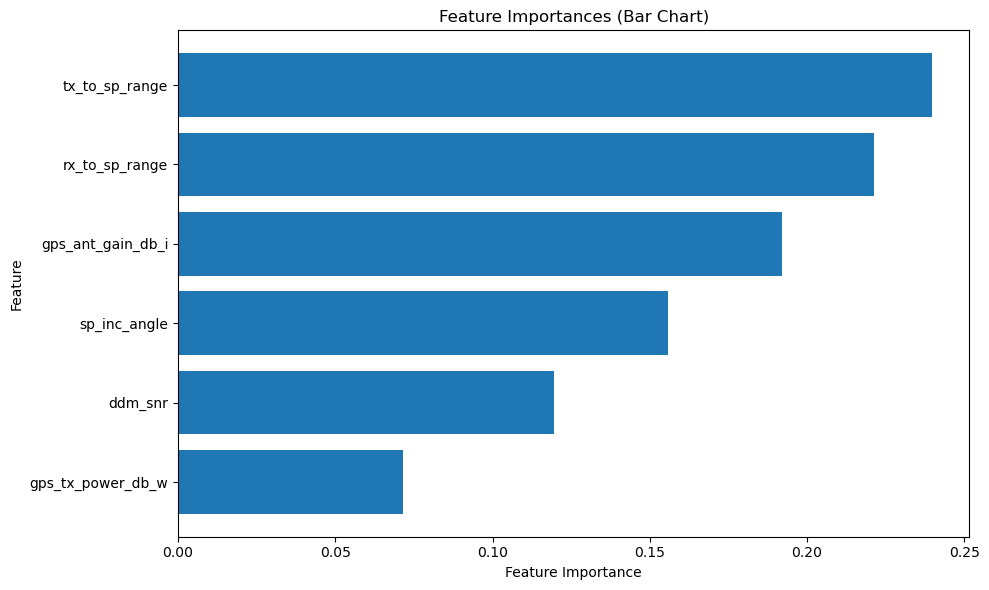

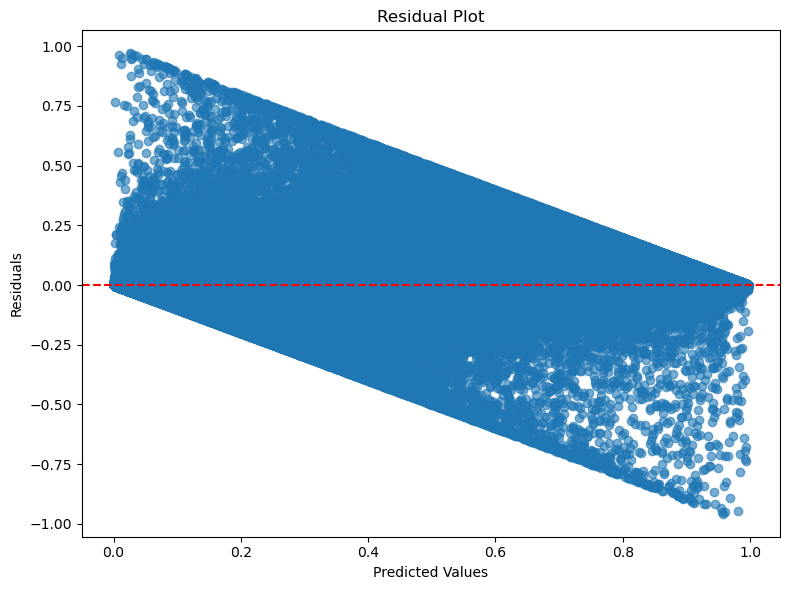

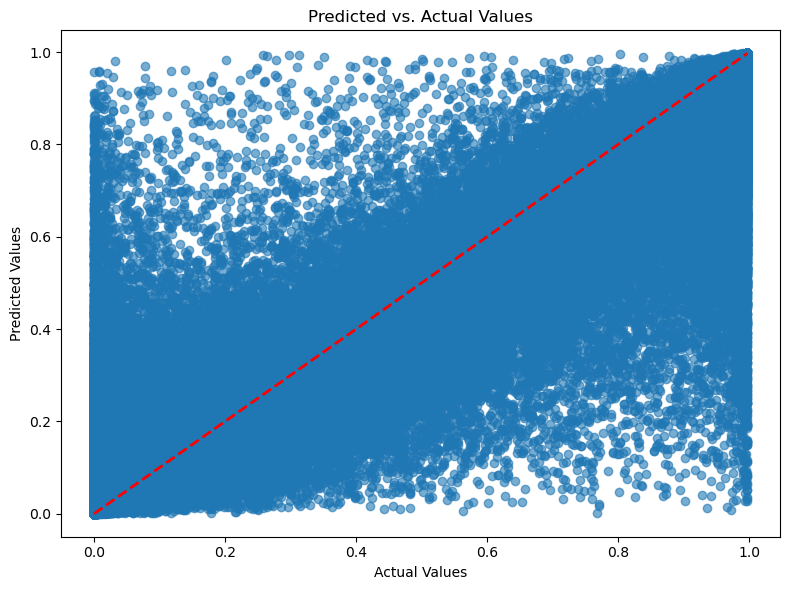

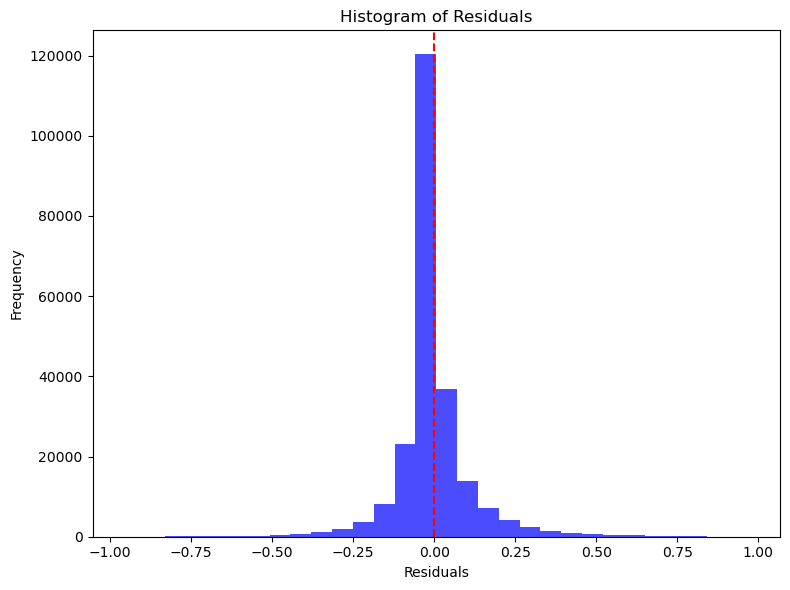

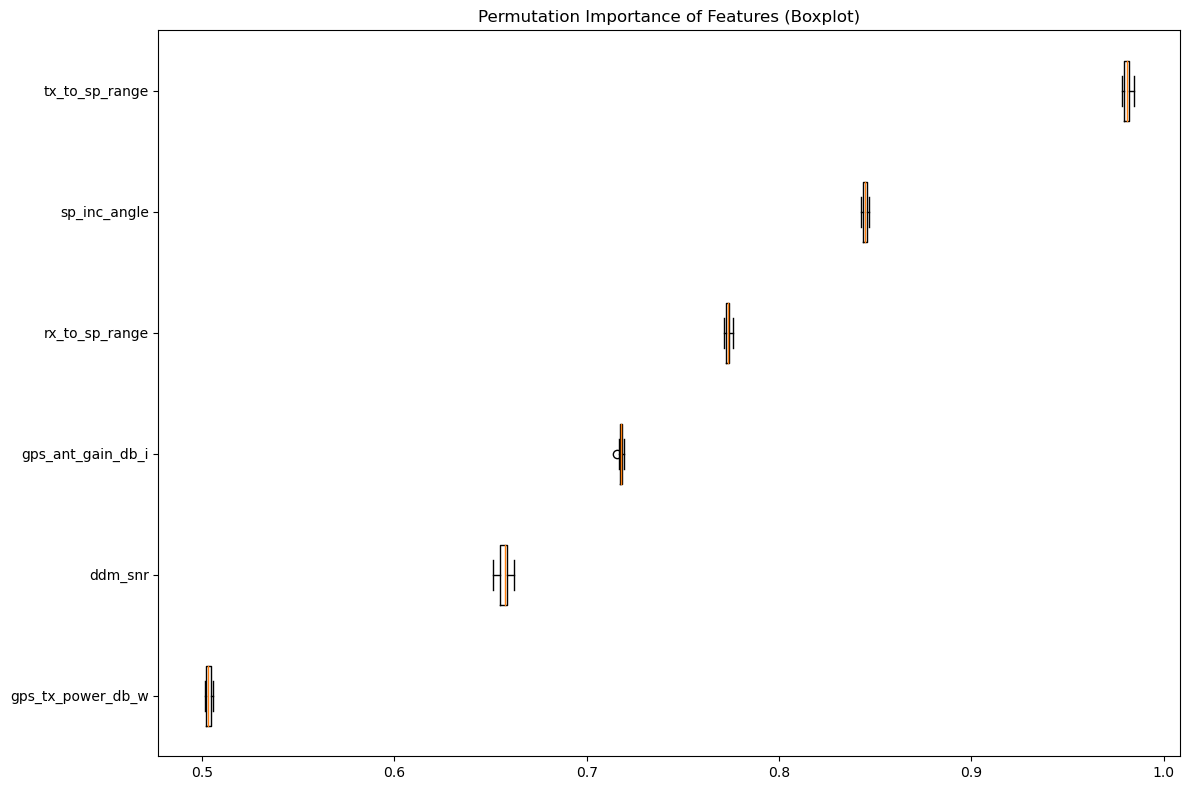

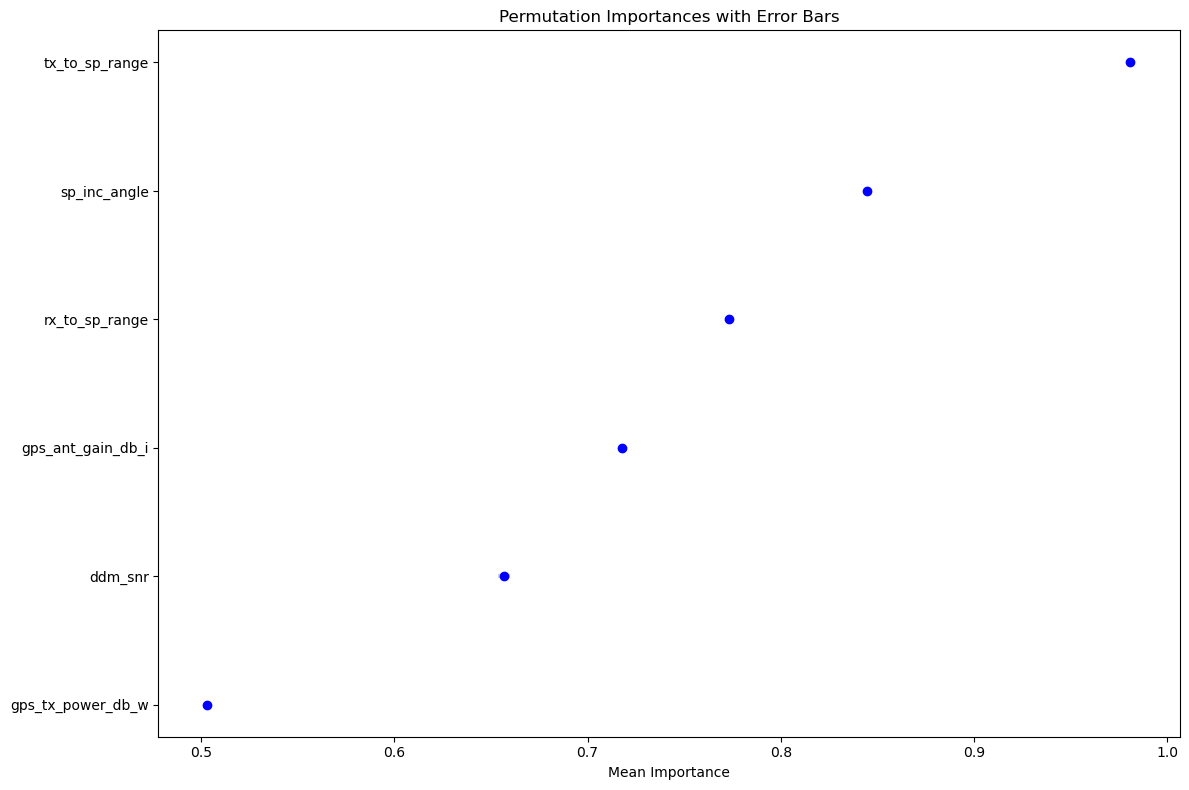

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
)
from sklearn.model_selection import cross_val_score

# Make predictions on the test set
y_pred = rf_model_with_location.predict(X_test)

# Evaluate the model using additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

# Cross-Validation Scores
cv_scores = cross_val_score(rf_model_with_location, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_scores)
cv_rmse = np.sqrt(cv_mse)
print(f"Cross-Validated MSE: {cv_mse}")
print(f"Cross-Validated RMSE: {cv_rmse}")

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model_with_location.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(feature_importances)

# Visualizations
# 1. Feature Importance Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances (Bar Chart)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 2. Residual Analysis
residuals = y_test - y_pred

# 2.1 Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

# 2.2 Prediction vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.tight_layout()
plt.show()

# 2.3 Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.tight_layout()
plt.show()

# 3. Permutation Importance
result = permutation_importance(rf_model_with_location, X_test, y_test, n_repeats=20, random_state=42, n_jobs=1)

# 3.1 Boxplot for Permutation Importance
perm_sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_test.columns[perm_sorted_idx])
plt.title("Permutation Importance of Features (Boxplot)")
plt.tight_layout()
plt.show()

# 3.2 Permutation Importance with Error Bars
plt.figure(figsize=(12, 8))
plt.errorbar(
    result.importances_mean[perm_sorted_idx],
    X_test.columns[perm_sorted_idx],
    xerr=result.importances_std[perm_sorted_idx],
    fmt='o',
    color='blue',
    ecolor='lightgray',
    elinewidth=3,
    capsize=0
)
plt.title("Permutation Importances with Error Bars")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()


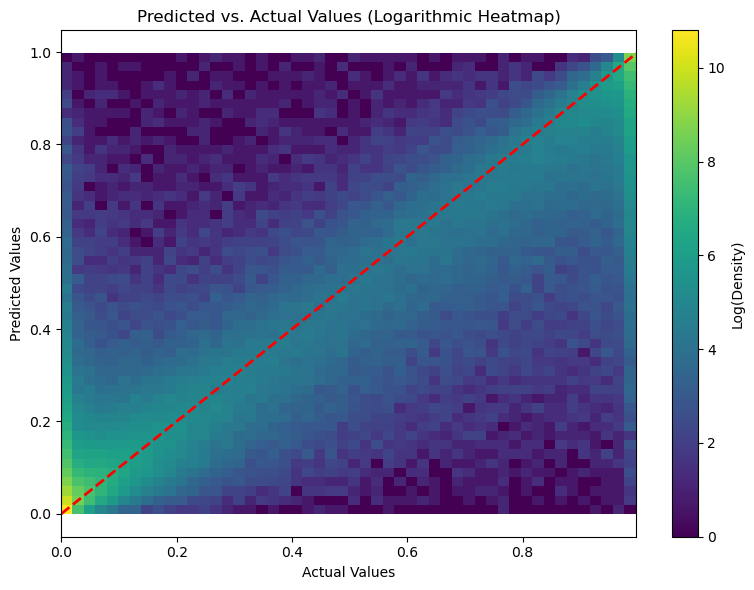

In [12]:
import numpy as np

# Prediction vs. Actual Values with Logarithmic Heatmap
plt.figure(figsize=(8, 6))

# Create a 2D histogram for density estimation
heatmap, xedges, yedges = np.histogram2d(y_test, y_pred, bins=50)

# Apply logarithmic transformation to the density
log_heatmap = np.log1p(heatmap)  # Use log1p to avoid log(0)

# Plot the heatmap
plt.imshow(
    log_heatmap.T,  # Transpose to align axes correctly
    origin='lower',  # Ensure the origin is at the bottom-left
    aspect='auto',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='viridis'
)

# Add colorbar to show density scale
plt.colorbar(label='Log(Density)')

# Add labels and title
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Logarithmic Heatmap)")
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

# Define base file paths
input_base = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/cygnss_data_month_{:02d}.csv'
output_base = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_without_location/water_fraction_prediction_23_{}.csv'

# Loop through months 01 to 12
for month in range(10, 13):
    input_file = input_base.format(month)
    output_file = output_base.format(month)

    try:
        # Load the dataset
        with open(input_file, 'r') as file:
            new_data = pd.read_csv(file, skip_blank_lines=True)
            data = new_data.copy()
        
        # Extract the month if the 'date' column exists
        if 'date' in new_data.columns:
            new_data['date'] = new_data['date'].astype(str).replace('', '0000-00-00')
            new_data['month'] = new_data['date'].str.slice(5, 7).apply(lambda x: int(x) if x.isdigit() else 0)

        # Drop irrelevant columns
        columns_to_ignore = [
            "top_left_lat", "top_left_lon", "top_right_lat", "top_right_lon",
            "bottom_left_lat", "bottom_left_lon", "bottom_right_lat", "bottom_right_lon",
        ]
        new_data = new_data.drop(columns=[col for col in columns_to_ignore if col in new_data.columns], errors='ignore')

        # Ensure features match the training dataset
        missing_columns = set(X.columns) - set(new_data.columns)
        if missing_columns:
            for col in missing_columns:
                new_data[col] = 0  # Add missing columns with default values

        extra_columns = set(new_data.columns) - set(X.columns)
        if extra_columns:
            new_data = new_data.drop(columns=list(extra_columns))  # Drop extra columns

        # Make predictions
        water_fraction_predictions = rf_model_with_location.predict(new_data)

        # Add predictions to the dataset
        data['water_fraction_predicted'] = water_fraction_predictions

        # Keep only the desired columns for the output
        output_data = data[['date', 'sp_lon', 'sp_lat', 'water_fraction_predicted']]

        # Save the dataset with predictions
        output_data.to_csv(output_file, index=False)
        print(f"Predictions for month {month:02d} saved to {output_file}")

    except FileNotFoundError:
        print(f"File not found for month {month:02d}: {input_file}")
    except Exception as e:
        print(f"An error occurred for month {month:02d}: {e}")


An error occurred for month 10: [Errno 9] Bad file descriptor
Predictions for month 11 saved to /Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_without_location/water_fraction_prediction_23_11.csv
An error occurred for month 12: [Errno 9] Bad file descriptor


In [4]:
import pandas as pd

# Define base file paths
input_base = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/cygnss_data_month_{:02d}_a.csv'
output_base = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_without_location/water_fraction_prediction_23_{}_a.csv'

# Loop through months 01 to 12
for month in [10,12]:
    input_file = input_base.format(month)
    output_file = output_base.format(month)

    try:
        # Load the dataset
        with open(input_file, 'r') as file:
            new_data = pd.read_csv(file, skip_blank_lines=True)
            data = new_data.copy()
        
        # Extract the month if the 'date' column exists
        if 'date' in new_data.columns:
            new_data['date'] = new_data['date'].astype(str).replace('', '0000-00-00')
            new_data['month'] = new_data['date'].str.slice(5, 7).apply(lambda x: int(x) if x.isdigit() else 0)

        # Drop irrelevant columns
        columns_to_ignore = [
            "top_left_lat", "top_left_lon", "top_right_lat", "top_right_lon",
            "bottom_left_lat", "bottom_left_lon", "bottom_right_lat", "bottom_right_lon",
        ]
        new_data = new_data.drop(columns=[col for col in columns_to_ignore if col in new_data.columns], errors='ignore')

        # Ensure features match the training dataset
        missing_columns = set(X.columns) - set(new_data.columns)
        if missing_columns:
            for col in missing_columns:
                new_data[col] = 0  # Add missing columns with default values

        extra_columns = set(new_data.columns) - set(X.columns)
        if extra_columns:
            new_data = new_data.drop(columns=list(extra_columns))  # Drop extra columns

        # Make predictions
        water_fraction_predictions = rf_model_with_location.predict(new_data)

        # Add predictions to the dataset
        data['water_fraction_predicted'] = water_fraction_predictions

        # Keep only the desired columns for the output
        output_data = data[['date', 'sp_lon', 'sp_lat', 'water_fraction_predicted']]

        # Save the dataset with predictions
        output_data.to_csv(output_file, index=False)
        print(f"Predictions for month {month:02d} saved to {output_file}")

    except FileNotFoundError:
        print(f"File not found for month {month:02d}: {input_file}")
    except Exception as e:
        print(f"An error occurred for month {month:02d}: {e}")


Predictions for month 10 saved to /Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_without_location/water_fraction_prediction_23_10_a.csv
Predictions for month 12 saved to /Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_without_location/water_fraction_prediction_23_12_a.csv


In [5]:
import pandas as pd

# Define base file paths
input_base = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/cygnss_data_month_{:02d}_b.csv'
output_base = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_without_location/water_fraction_prediction_23_{}_b.csv'

# Loop through months 01 to 12
for month in [10,12]:
    input_file = input_base.format(month)
    output_file = output_base.format(month)

    try:
        # Load the dataset
        with open(input_file, 'r') as file:
            new_data = pd.read_csv(file, skip_blank_lines=True)
            data = new_data.copy()
        
        # Extract the month if the 'date' column exists
        if 'date' in new_data.columns:
            new_data['date'] = new_data['date'].astype(str).replace('', '0000-00-00')
            new_data['month'] = new_data['date'].str.slice(5, 7).apply(lambda x: int(x) if x.isdigit() else 0)

        # Drop irrelevant columns
        columns_to_ignore = [
            "top_left_lat", "top_left_lon", "top_right_lat", "top_right_lon",
            "bottom_left_lat", "bottom_left_lon", "bottom_right_lat", "bottom_right_lon",
        ]
        new_data = new_data.drop(columns=[col for col in columns_to_ignore if col in new_data.columns], errors='ignore')

        # Ensure features match the training dataset
        missing_columns = set(X.columns) - set(new_data.columns)
        if missing_columns:
            for col in missing_columns:
                new_data[col] = 0  # Add missing columns with default values

        extra_columns = set(new_data.columns) - set(X.columns)
        if extra_columns:
            new_data = new_data.drop(columns=list(extra_columns))  # Drop extra columns

        # Make predictions
        water_fraction_predictions = rf_model_with_location.predict(new_data)

        # Add predictions to the dataset
        data['water_fraction_predicted'] = water_fraction_predictions

        # Keep only the desired columns for the output
        output_data = data[['date', 'sp_lon', 'sp_lat', 'water_fraction_predicted']]

        # Save the dataset with predictions
        output_data.to_csv(output_file, index=False)
        print(f"Predictions for month {month:02d} saved to {output_file}")

    except FileNotFoundError:
        print(f"File not found for month {month:02d}: {input_file}")
    except Exception as e:
        print(f"An error occurred for month {month:02d}: {e}")


Predictions for month 10 saved to /Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_without_location/water_fraction_prediction_23_10_b.csv
Predictions for month 12 saved to /Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_without_location/water_fraction_prediction_23_12_b.csv
